In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.functional as F
# from torchvision import D
from torch.utils.data.sampler import SubsetRandomSampler

In [21]:
data = ImageFolder("/home/mikey/Downloads/flowers", transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((300,250))]))

In [34]:
train_loader = torch.utils.data.DataLoader(data, batch_size = 500, shuffle = True)

In [35]:
class_names = data.classes

In [47]:
train_data = torch.utils.data.DataLoader(train_loader, batch_size = 32)
    

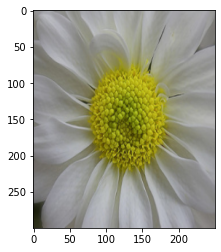

In [48]:
plt.imshow(image.permute(1,2,0))

In [ ]:
batch = next(iter(train_loader))

In [ ]:
len(batch)

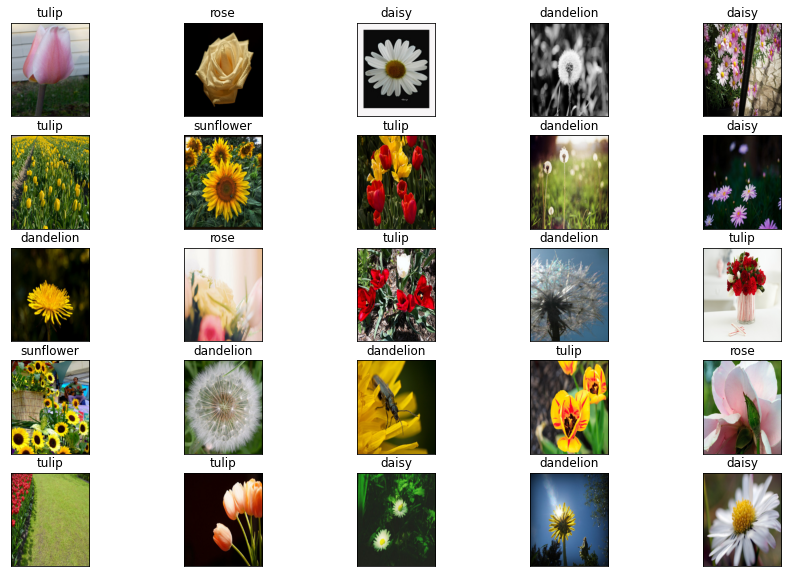

In [44]:
images, labels = batch

fig = plt.figure(figsize = (15,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].permute(1,2,0))
    plt.title(class_names[labels[i]])
    
plt.show()

In [45]:
images.shape

torch.Size([500, 3, 300, 250])

In [109]:
from collections import Counter

In [110]:
Counter(data.targets)

Counter({0: 769, 1: 1052, 2: 534, 3: 734, 4: 984})

In [135]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(32 * 32 * 32, 32)
        self.act3 = nn.ReLU()
        self.fc2 = nn.Linear(32, 5)
        
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 32 * 32 * 32)
        
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [136]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=32, bias=True)
  (act3): ReLU()
  (fc2): Linear(in_features=32, out_features=5, bias=True)
)


In [137]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(1053861, [432, 16, 4608, 32, 1048576, 32, 160, 5])

In [138]:
def train_loop(model, optimizer, loss_fn, train_loader, num_epochs):
    for epoch in range(num_epochs+1):
        loss_train = 0.0
        for image, label in train_loader:
            output = model(image)
            loss = loss_fn(output, label)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
            
            
            print("{} epoch: {}/{} loss: {}".format(datetime.datetime.now(), epoch, num_epochs, loss_train / len(train_loader)))
            
                             
                  

In [139]:
import torch.optim as optim

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()
train_loop(
    model = model,
    optimizer = optimizer,
    loss_fn = loss_fn,
    train_loader = train_loader,
    num_epochs = 10
)